# Assignment 2

Complete the questions below in any order you like. Remember to commit the changes to GitHub as you go. The total marks for this assignment is 30.

 **Please enter your student number in the cell below**


# Question 0 [3 marks]

You should have saved this notebook to your ACM20030-Assignments folder. Now:
- commit the notebook to your local repository
- push the changes to the GitHub
- You will get marks for the question for using Git (i.e., pushing your assignment to the repository when asked below)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

# Question 1: Bracketing and bisection method [9 marks]

### Q. 1a [2 marks]

Define the following quintic

$f(x) = 6 x^5-25 x^4-115 x^3+325 x^2+709 x-420$ and plot it in the range $x=-3.5\dots5.5$

f(-3.5) = -892.5
f(-3.0) = 0.0
f(-2.5) = 73.125
f(-2.0) = -210.0
f(-1.5) = -536.25
f(-1.0) = -720.0
f(-0.5) = -680.625
f(0.0) = -420.0
f(0.5) = 0.0
f(1.0) = 480.0
f(1.5) = 905.625
f(2.0) = 1170.0
f(2.5) = 1196.25
f(3.0) = 960.0
f(3.5) = 511.875
f(4.0) = 0.0
f(4.5) = -307.5
f(5.0) = 0.0
f(5.5) = 1498.125


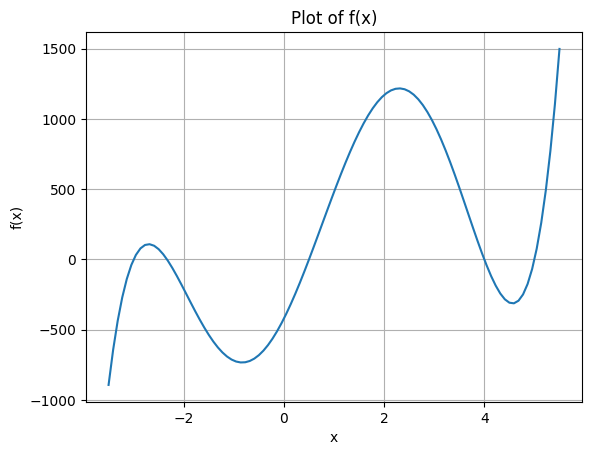

In [ ]:

def f(x): # Define f(x) as the quintic above
  return 6*x**5 - 25*x**4 - 115*x**3 + 325*x**2 + 709*x - 420

for x in np.arange(-3.5,6.0,0.5): # Define a range for x in [-3.5,6)
# with 0.5 increments, in order to end at 5.5.
  print(f"f({x}) = {f(x)}") # Print the values for f(x) within this range, for reference.

# To plot our function f(x)
xvalues = np.linspace(-3.5, 5.5, 100) # Define the range of x-values from -3.5 to 5.5
# with 100 evenly spaced numbers between them.
yvalues = f(xvalues) # Define the y-values as the outputs of f(x) according to our defined range
plt.plot(xvalues,yvalues) # Plot the x-values against the y-values
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x)')
plt.grid(True)
plt.show()



### Q. 1b [2 marks]
Using the plot, pick values of $a$ and $b$ such that $f(a) < 0$ and $f(b) > 0$ and the function has a **single** root in the region $(a,b)$. Assign variables called a and b to these values and print the values of $f(a)$ and $f(b)$.

In [ ]:
# From visualising the plot above and from the printed outputs above,
# the graph crosses 0 at x = 5. Thus x = 5 is a single root

# Picking a = 4.5 and b = 5.5 provides for a single root in the region (a,b)
a = 4.5 # f(a) < 0 as shown in the plot
b = 5.5 # f(b) > 0 as shown in the plot

# Print the following to confirm the above conditions
print(f"f({a}) = {f(a)}")
print(f"f({b}) = {f(b)}")
print(f"f({5}) = {f(5)}") # Highlights that x = 5 is a root as f(5) = 0



f(4.5) = -307.5
f(5.5) = 1498.125
f(5) = 0


Use the following FindRootBisection method to find the root to within a precision of $10^{-12}$

In [ ]:
# This function only works when a < b and f(a) < 0 < f(b)
def FindRootBisection(f, a, b, tol, printSteps=False):
    left = a
    right = b
    while right-left > tol:
        midpoint = (left+right)/2
        if(f(midpoint) < 0):
            left = midpoint
        else:
            right = midpoint
        if(printSteps == True):
            print(midpoint)
    return midpoint

In [ ]:
# Define a,b and tol
a = 4.5 # Since f(a) < 0 < f(b)
b = 5.5 # Since f(b) > 0
tol = 1e-12
# Define and print the root
root = FindRootBisection(f, a, b, tol, printSteps = True)
print(f"The root is {root}")




5.0
4.75
4.875
4.9375
4.96875
4.984375
4.9921875
4.99609375
4.998046875
4.9990234375
4.99951171875
4.999755859375
4.9998779296875
4.99993896484375
4.999969482421875
4.9999847412109375
4.999992370605469
4.999996185302734
4.999998092651367
4.999999046325684
4.999999523162842
4.999999761581421
4.9999998807907104
4.999999940395355
4.999999970197678
4.999999985098839
4.999999992549419
4.99999999627471
4.999999998137355
4.999999999068677
4.999999999534339
4.999999999767169
4.999999999883585
4.999999999941792
4.999999999970896
4.999999999985448
4.999999999992724
4.999999999996362
4.999999999998181
4.9999999999990905
The root is 4.9999999999990905


### Q. 1c [5 marks]
As the comment on the above FindRootBisection( ) function says it only works when $a<b$ and $f(a) < 0 < f(b)$. Create a new function that:
 - **also** works when $f(a) > 0 > f(b)$.
 - Checks that $\text{sign}(f(a)) \neq \text{sign}(f(b))$. If not the function should return "sign(f(a)) = sign(f(b)) ", where $a$ and $b$ have been replaced by their values

Call your new function FindRootBisectionImproved( ).  
Useful function: np.sign(x) will return sign(x)

Check your new function by:
 - finding the root between $x = 3.5$ and $x=4.5$
 - finding the root between $x = 0$ and $x=2$
 - attempting to find a root between $x=6$ and $x=8$ (there is not root in this region)

In all cases try to find the root with a tolerance of $10^{-12}$

In [85]:
# Define a function FindRootBisectionImproved - that also works when f(a) > 0 > f(b)
def FindRootBisectionImproved(f, a, b, tol = 1e-12, printSteps=False):
  if np.sign(f(a)) == np.sign(f(b)): # Checks if sign(f(a)) equals sign(f(b))
    return f"sign(f(a)) = sign(f(b))" # If so, returns that they equal

# Otherwise if their signs do not equal we define
  left = a
  right = b
  while right-left > tol:
    midpoint = (left+right)/2
    if (f(midpoint) < 0):
      left = midpoint
    else:
      right = midpoint

  return midpoint

  # Test new function to identify potential roots between the following:
  root1 = FindRootBisectionImproved(f, 3.5, 4.5, tol = 1e-12, printSteps=True)
  root2 = FindRootBisectionImproved(f, 0, 2, tol = 1e-12, printSteps=True)
  root3 = FindRootBisectionImproved(f, 6, 8, tol = 1e-12, printSteps=True)

  print(f"The root between 3.5 and 4.5 is {root1}")
  print(f"The root between 0 and 2 is {root2}")
  print(f"The root between 6 and 8 is {root3}")




**Commit this question to your git repository and push the changes to GitHub**

# Question 2: Newton-Raphson method [9 marks]

### Q. 2a [3 marks]
 - Define a function $p(x) = x\log(\sqrt{x^2})$. Compute its derivative and define it as $dp(x) = \dots$
 - Plot the function between $x=-2$ and $x=2$. Label the plot axes and use a grid.
 - By visual inspection state the location of the three roots

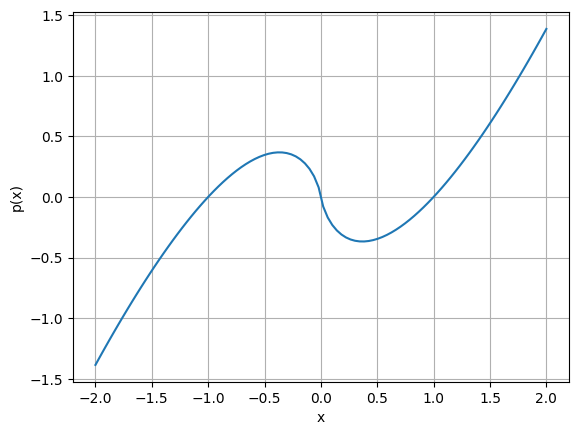

In [ ]:
def p(x):
  return x*np.log(np.sqrt(x**2))
def dp(x):
  return np.log(np.sqrt(x**2)) + x/np.sqrt(x**2)
xvalues = np.linspace(-2, 2, 100)
yvalues = p(xvalues)
plt.plot(xvalues,yvalues)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True)
plt.show()

### Q. 2b [2 marks]
 - Starting with a value $x_0$ near the root at $x=1$ such that $|x_0-1| \ge 0.5$ use the below Newton-Raphson code to find the root to accuracy of $1\times10^{-6}$

In [ ]:
def FindRootNewtonRaphson(f, df, x0, tol, printSteps=False):
    f0 = f(x0)
    count = 1
    while np.abs(f0) > tol and count < 20:
        f0 = f(x0)
        x0 = x0 - f0/df(x0)
        count += 1
        if(printSteps):
            print("x_%d = %.14lf" % (count, x0))
    return x0

### Q. 2c [4 marks]
As we discussed in the lectures, the Newton-Raphson method (usually) converges quadradically if an initial guess is given that is sufficiently close to the root. If the guess is too far from the root the method can diverge. In this question we will find the critical value between converging and diverging where the method oscilliates with period 2.

If we define $F(x) = x - p(x)/p'(x)$, then a period-2 orbit will occur when $F(F(x)) = x$. In general this will be a complicated function so it might be very difficult to find the solution analytically. Instead, we can write this equation as $F(F(x)) - x = 0$, so the value of $x$ we want is the root.

- Define a function F(x)
- Define a function F2(x) which returns $F(F(x)) - x$
- Plot F2(x) between $x=-0.2\dots0.2$. Restrict the range on the $y$-axis to be between $-0.5$ and $0.5$. Add labels and a grid.

- We want to find a root with $x \neq \{-1,0,1\}$. As we don't have easy access to the derivative of the function $F2(x)$ use the bisection method function from above to find a root to a precision of $10^{-15}$. Use the plot from the previous part to bracket a root. **Assign** the vaue of the root of the variable 'x2' and also print(x2).
- Using the Newton-Raphson method with the function $p(x)$ and the initial guess x2. Set the final argument to True to print out the steps in the method takes. You should see that they oscillate between two values and does not converge.

By slightly perturbing the initial guess we can get the method to converge or diverge. Try:
 - adding $10^{-3}$ to the initial guess. Does the method converge or diverge? If it converges, to which root does it converge?
 - subtracting $10^{-3}$ from the initial guess. Does the method converge or diverge? If it converges, to which root does it converge?

In both cases set the final argument to 'True' to get the function to print the steps the method is taking

**Commit this question to your git repository and push the changes to GitHub**

# Question 3: Slow convergence of the Newton-Raphson method at repeated roots [9 marks]
The Newton-Raphson method usual converges quadratically but it will converge more slowly at repeated roots. In this question we will look at an example of this.

Define the function $g(x) = (x+1)^2(x-2)$, and also define its derivative $g'(x)$. Plot the function from $x=-2\dots2.5$

Run the FindRootNewtonRaphson command with the final (optional) argument set to True to see the steps the algorithm takes. Run it with:
 - the initial value of $x_0 = -1.5$
 - the initial value of $x_0 = 1.5$

What do you notice about the convergence rates in these two cases? Let's examine it more carefully. The function below returns the individual steps of the Newton-Raphson algorithm.

In [ ]:
def FindRootNewtonRaphsonSteps(f, df, x0, tol):
    steps = np.array([x0])
    f0 = f(x0)
    count = 1
    while np.abs(f0) > tol:
        f0 = f(x0)
        x0 = x0 - f0/df(x0)
        steps = np.append(steps, x0)
        count += 1
    return steps

Using the above function:
- compute the steps for the function $g(x)$ with  $x_0 = 1.5$. Assign the result to a variable.
- compute the steps for the function $g(x)$ with  $x_0 = -1.5$. Assign the result to a different variable.

Plot the absolute difference between the steps and the relevant root, i.e., $|x_n - x_*|$, on a log scale.

You should find the repeated difference for the repeated root looks linear on the log-scale, which is the same as we saw for the bisection method. This (correctly) suggests that for repeated roots the Newton-Raphson converges linearly (rather than quadratically)

**Commit this question to your git repository and push the changes to GitHub. Your assignment will be graded directly from GitHub.**

# Bonus question

The below question will not be graded but is provided for extra practice. Note the material in the question will not be examined.


We've seen that the Bisection method converges linearly and the Newton-Raphson method converges quadratically. This raises the question: is there a method that converges cubicly (or higher?).

Indeed such a method exists: [Halley's Method](https://en.wikipedia.org/wiki/Halley%27s_method), which is one of a broad class of [Householder's methods](https://en.wikipedia.org/wiki/Householder%27s_method)

Implement Halley's method and show that the converges is faster than the Newton-Raphson method. Try testing it on the polynomial $f(x) = -1+10x+6x^2+x^3$ and compare your results to the Example on the Householder's methods Wikipedia page linked above.

Note: Halley's method converges so fast it that, using machine precision arithmetic, the convergence plot would only have a few points on it. See [mpmath](https://mpmath.org/) if you want to do extended precision calculations in Python.